# Linear Regression with Gradient Descent in the practice

In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

In [2]:
def least_squares(b0, b1, points):
    totalError = 0
    N = float(len(points))
    for x,y in points:
        totalError += (y - (b1*x+b0)) ** 2
    return totalError/2.*N

In [3]:
def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(points))
    for x,y in points:
        b0_gradient += (1/N) * (y - ((b1_current * x) + b0_current))
        b1_gradient += (1/N) * x * (y - ((b1_current * x) + b0_current))
    new_b0 = b0_current + (learningRate * b0_gradient)
    new_b1 = b1_current + (learningRate * b1_gradient)
    return [new_b0, new_b1, least_squares(new_b0, new_b1, points)]

In [4]:
def run_gradient_descent(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    slope=[]
    intersect=[]
    error=[]
    for i in range(num_iterations):
        b0, b1 , e= step_gradient(b0, b1, np.array(points), learning_rate)
        slope.append(b1)
        intersect.append(b0)
        error.append(e)
    return [b0, b1, e, slope, intersect,error]

In [5]:
iris = sns.load_dataset('iris', engine='python')
X = iris['petal_width'].tolist()
Y = iris['petal_length'].tolist()
points = np.dstack((X, Y))[0]

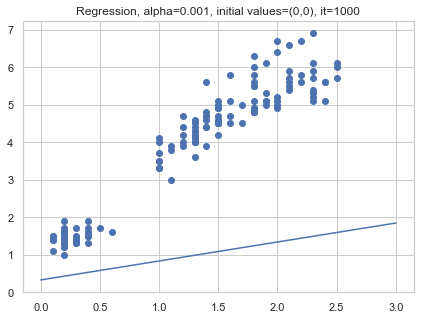

In [6]:
learning_rate = 0.0001
initial_b0 = 0 
initial_b1 = 0 
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)

plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr=np.arange(0,3.5)
plt.plot(xr,(xr*b1)+b0);
plt.title('Regression, alpha=0.001, initial values=(0,0), it=1000');

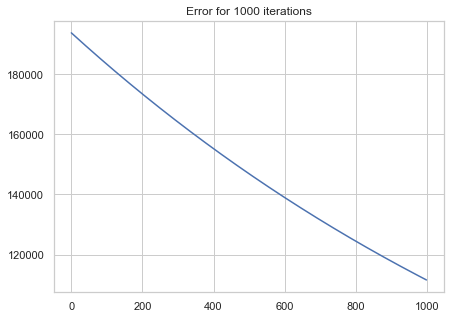

In [7]:
plt.figure(figsize=(7,5))
xr = np.arange(0,1000)
plt.plot(xr, np.array(error).transpose());
plt.title('Error for 1000 iterations');

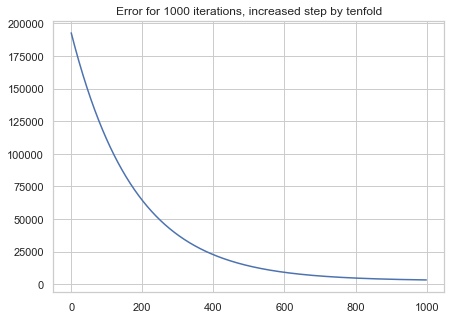

In [8]:
learning_rate = 0.001 #Last one was 0.0001
initial_b0 = 0 
initial_b1 = 0 
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, increased step by tenfold');

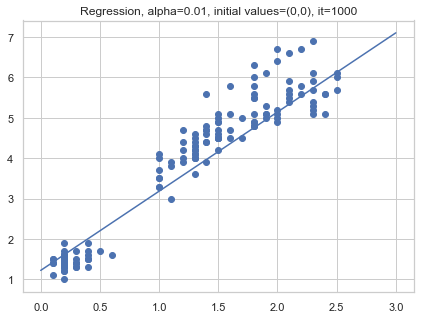

In [9]:
plt.figure(figsize=(7,5))
plt.scatter(X, Y)
xr = np.arange(0, 3.5)
plt.plot(xr, (xr*b1)+b0);
plt.title('Regression, alpha=0.01, initial values=(0,0), it=1000');

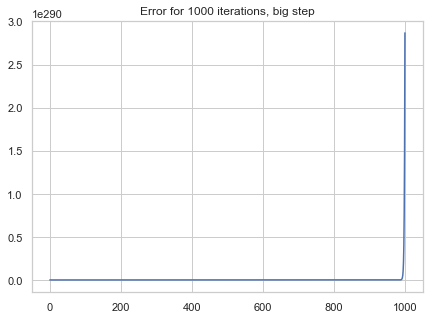

In [10]:
learning_rate = 0.85 #LAst one was 0.0001
initial_b0 = 0 
initial_b1 = 0 
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, big step');

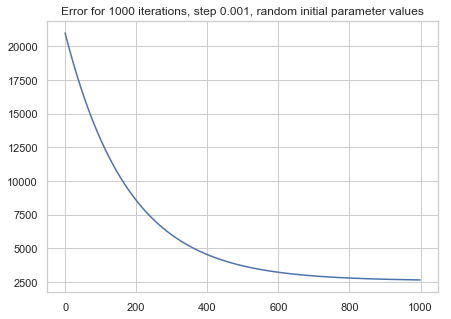

In [11]:
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values');

### data normalization

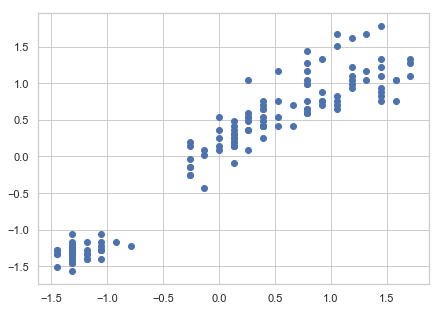

In [12]:
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
x_mean =np.mean(points[:,0])
y_mean = np.mean(points[:,1])
x_std = np.std(points[:,0])
y_std = np.std(points[:,1])

X_normalized = (points[:,0] - x_mean)/x_std
Y_normalized = (points[:,1] - y_mean)/y_std

plt.figure(figsize=(7,5))
plt.scatter(X_normalized,Y_normalized)

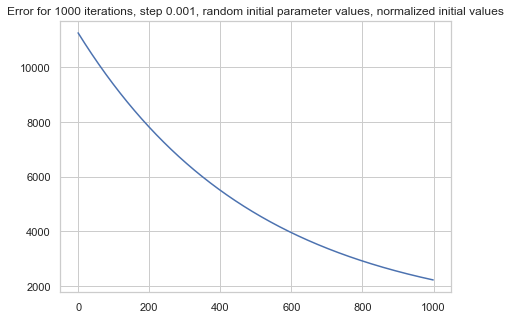

In [13]:
points=np.dstack((X_normalized,Y_normalized))[0]
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values, normalized initial values');